# Reproducing Balaban Exp3 CDA Study (2019)

## Notes

In [1]:
import numpy as np
import glob
import pickle
import pandas as pd

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_bdf

import sys
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/')
from cda_utils import get_epochs, get_CDA, prep_report, fill_report, get_report, checksum, add_cda_report, get_CDA_perf_report
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Balaban-2019/')
from events import get_specific_events
 
import matplotlib.pyplot as plt
%matplotlib inline

study_id = 'Balaban2019-Exp3'

## 1. Load, Prep & CDA

Processing: 649.bdf...
Extracting EDF parameters from /Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp3_EEG/649.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1107199  =      0.000 ...  4324.996 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
['Fp1', 'AF3', 'F7', 'F3', 'P1', 'FCz', 'T7', 'C3', 'P5', 'PO7', 'P7', 'P3', 'POz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'PO8', 'P6', 'C4', 'T8', 'Fz', 'P2', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'Pz', 'EXG7', 'EXG8', 'Status']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.80 and n_interpolate=4


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

Dropped 2 epochs: 2, 51


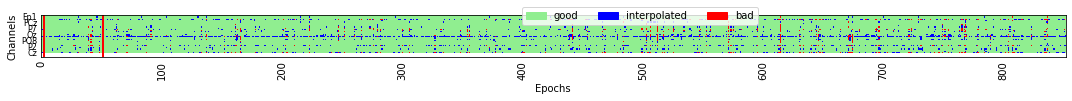

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[649.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: 0.35342529841735143
[649.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: 0.6046923336746336
[649.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -1.350431

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

Dropped 129 epochs: 1, 2, 6, 10, 18, 21, 24, 31, 36, 46, 49, 64, 65, 68, 89, 93, 103, 106, 109, 110, 112, 114, 115, 125, 126, 129, 131, 132, 133, 138, 141, 144, 147, 148, 151, 155, 163, 167, 168, 174, 180, 194, 206, 207, 216, 218, 219, 221, 222, 224, 226, 227, 232, 233, 234, 239, 240, 244, 247, 252, 253, 258, 260, 263, 264, 265, 266, 272, 287, 288, 289, 291, 302, 311, 312, 315, 324, 329, 333, 335, 337, 354, 355, 360, 364, 365, 371, 374, 376, 395, 397, 406, 413, 414, 416, 428, 432, 442, 461, 470, 493, 499, 513, 514, 521, 536, 553, 603, 604, 606, 608, 611, 638, 695, 697, 713, 715, 723, 725, 735, 742, 786, 787, 790, 792, 815, 820, 828, 831


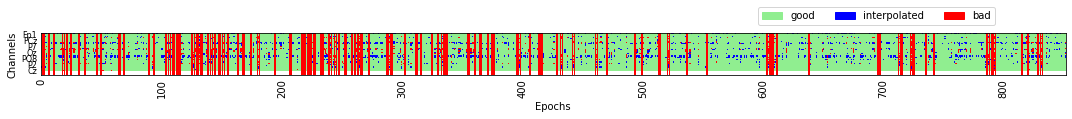

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[648.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -0.44294237103183576
[648.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: 0.663472863780444
[648.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -1.333343

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=1


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

Dropped 1 epoch: 316


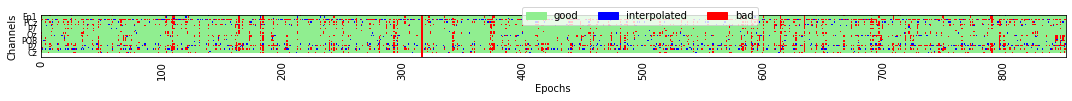

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[643.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -0.6309077373665142
[643.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: -0.7401137208461371
[643.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -0.17561

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

Dropped 15 epochs: 89, 95, 106, 177, 245, 248, 356, 392, 462, 527, 528, 548, 691, 775, 799


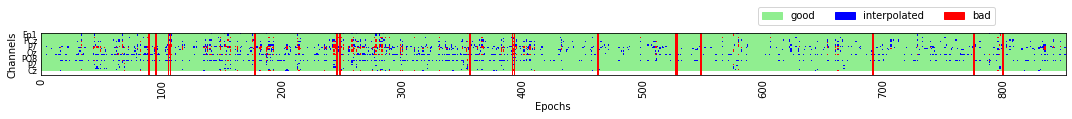

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[642.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -1.2778305561690833
[642.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: -0.9482575327626124
[642.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -3.23790

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

Dropped 21 epochs: 35, 66, 106, 133, 139, 168, 328, 337, 387, 480, 598, 630, 668, 701, 720, 731, 813, 815, 816, 825, 850


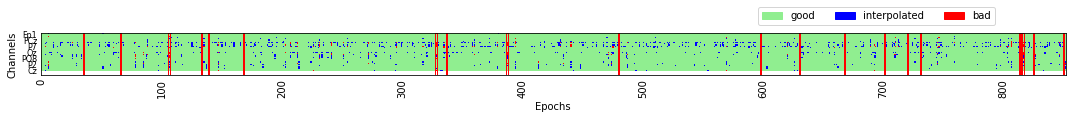

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[656.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -1.099354488921856
[656.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: -1.889119302465656
[656.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -0.2396612

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/864 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/864 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/864 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/864 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/864 [00:00<?,       ?it/s]

Dropped 84 epochs: 1, 29, 42, 43, 52, 53, 54, 59, 60, 79, 97, 98, 105, 117, 118, 132, 141, 142, 143, 164, 165, 171, 176, 188, 191, 207, 210, 237, 251, 275, 283, 289, 295, 304, 308, 312, 317, 318, 319, 321, 322, 328, 342, 344, 351, 355, 358, 365, 369, 372, 379, 380, 381, 390, 405, 409, 416, 419, 423, 461, 486, 511, 523, 540, 566, 571, 584, 640, 677, 686, 697, 722, 732, 747, 762, 781, 785, 787, 793, 814, 815, 818, 826, 863


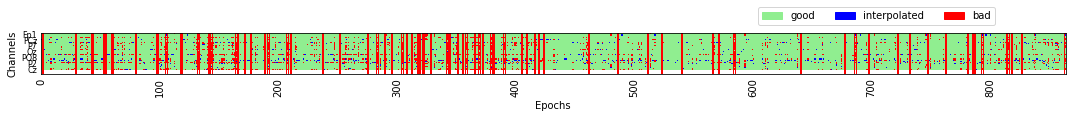

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[654.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -0.5953318084697102
[654.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: -1.2421282149675406
[654.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: 0.820445

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=31


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


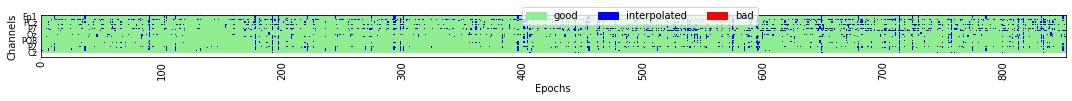

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[655.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -0.07596050906482517
[655.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: 1.0921760684370403
[655.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -1.44567

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

Dropped 50 epochs: 56, 71, 74, 81, 114, 118, 119, 123, 166, 168, 200, 225, 243, 266, 272, 286, 305, 382, 383, 385, 389, 400, 465, 466, 468, 510, 520, 522, 533, 549, 564, 565, 580, 581, 589, 594, 609, 610, 648, 677, 687, 696, 736, 755, 770, 835, 838, 843, 845, 848


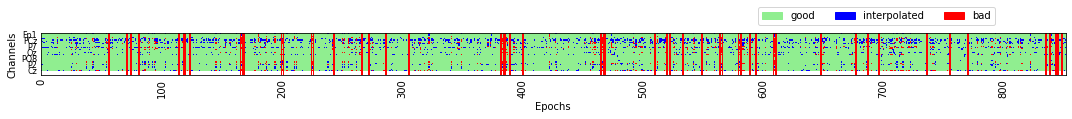

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[641.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -1.3818070885783238
[641.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: -0.2879261522615403
[641.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: 0.465736

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

Dropped 80 epochs: 20, 41, 48, 93, 103, 106, 115, 145, 165, 166, 167, 181, 184, 198, 204, 213, 216, 224, 236, 288, 291, 292, 314, 323, 347, 349, 360, 379, 380, 386, 411, 412, 415, 437, 438, 440, 446, 457, 458, 462, 470, 472, 486, 495, 506, 510, 511, 516, 544, 552, 555, 572, 573, 577, 601, 603, 615, 646, 648, 656, 672, 677, 685, 696, 701, 702, 703, 721, 747, 757, 767, 786, 788, 790, 795, 804, 811, 825, 831, 842


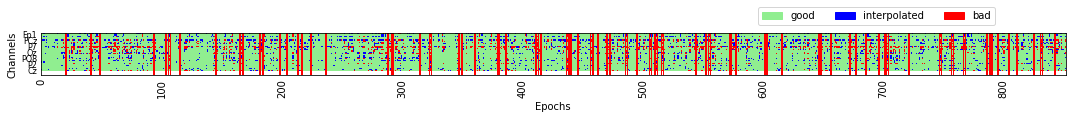

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[645.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -0.6973581784864725
[645.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: -1.082969246442071
[645.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -2.784308

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

Dropped 43 epochs: 80, 151, 180, 194, 199, 248, 257, 284, 299, 363, 384, 385, 395, 400, 409, 429, 459, 463, 468, 474, 475, 485, 493, 497, 504, 553, 559, 592, 619, 621, 626, 630, 631, 639, 644, 655, 687, 745, 765, 777, 799, 803, 826


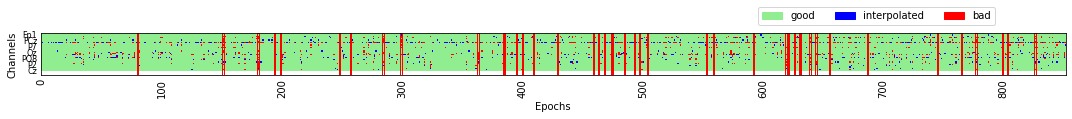

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[651.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -1.1279259265296147
[651.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: -1.6248371887488136
[651.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -1.10113

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.80 and n_interpolate=4


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


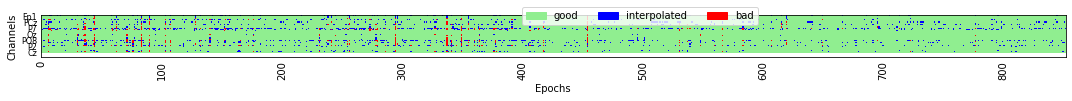

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[650.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -0.3811009806216335
[650.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: 0.5630629494988709
[650.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -1.734855

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.10 and n_interpolate=1


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

Dropped 175 epochs: 2, 3, 5, 9, 20, 22, 24, 25, 27, 29, 32, 34, 35, 38, 49, 51, 52, 53, 61, 62, 70, 71, 77, 78, 84, 88, 95, 96, 98, 99, 102, 103, 105, 107, 117, 120, 126, 129, 130, 137, 138, 139, 143, 152, 155, 158, 159, 164, 166, 168, 172, 173, 181, 182, 183, 185, 187, 188, 191, 194, 204, 217, 221, 233, 234, 240, 244, 246, 247, 254, 256, 262, 266, 273, 275, 291, 293, 294, 296, 299, 306, 308, 310, 337, 340, 341, 342, 357, 358, 364, 366, 374, 375, 376, 377, 382, 387, 403, 406, 407, 415, 420, 427, 428, 433, 437, 443, 449, 454, 479, 482, 485, 488, 500, 502, 505, 508, 509, 523, 524, 530, 531, 538, 542, 544, 552, 555, 593, 594, 603, 604, 605, 606, 609, 610, 613, 614, 630, 632, 644, 646, 650, 652, 653, 654, 655, 661, 680, 688, 690, 710, 714, 722, 724, 728, 734, 748, 751, 752, 754, 755, 764, 769, 770, 796, 799, 803, 804, 811, 816, 822, 828, 836, 838, 842


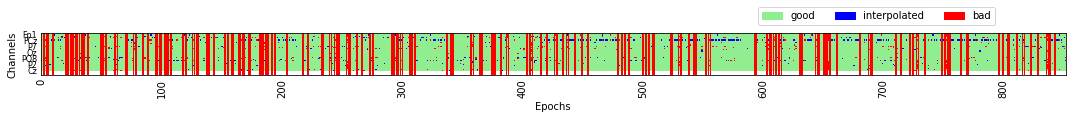

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[644.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -2.3341167216567267
[644.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: -3.1292680205366654
[644.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -0.26677

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/864 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/864 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/864 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/864 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/864 [00:00<?,       ?it/s]

Dropped 60 epochs: 21, 34, 47, 64, 142, 146, 176, 185, 194, 247, 275, 303, 337, 343, 360, 385, 393, 399, 417, 420, 421, 472, 478, 479, 480, 484, 485, 486, 490, 493, 502, 507, 518, 519, 520, 575, 583, 595, 623, 627, 672, 682, 694, 701, 724, 727, 732, 734, 737, 748, 815, 816, 820, 824, 825, 827, 835, 849, 858, 862


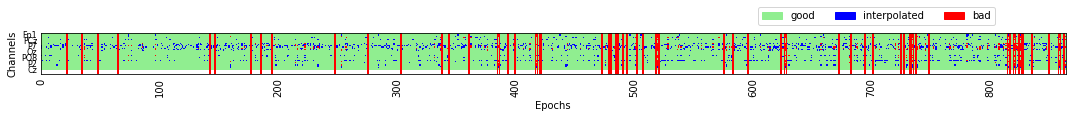

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[652.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: -1.1146726745865425
[652.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: -0.8970723088296204
[652.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -0.19530

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=1


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


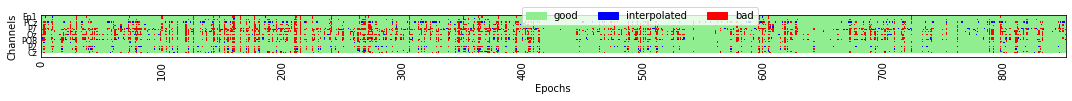

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[646.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: 0.7058505150994465
[646.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: 0.8318111328611868
[646.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -2.7788043

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/732 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/732 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/732 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/732 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.80 and n_interpolate=4


  0%|          | Repairing epochs : 0/732 [00:00<?,       ?it/s]

Dropped 3 epochs: 446, 474, 694


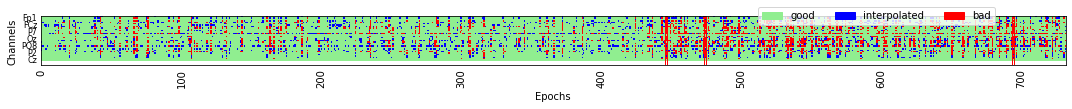

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[647.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: 0.1520075001378041
[647.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: 0.6498514817144735
[647.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -0.5472387

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:40: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=4


  0%|          | Repairing epochs : 0/852 [00:00<?,       ?it/s]

Dropped 1 epoch: 343


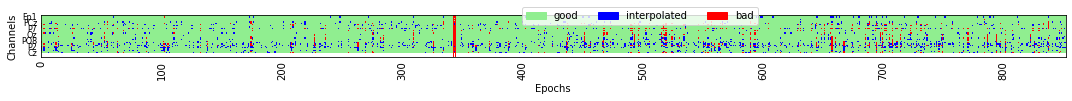

---------- CF_NoFrame-left-good -------------
---------- CF_NoFrame-left-bad -------------
---------- CF_NoFrame-right-good -------------
---------- CF_NoFrame-right-bad -------------
---------- Sep_NoFrame-left-good -------------
---------- Sep_NoFrame-left-bad -------------
---------- Sep_NoFrame-right-good -------------
---------- Sep_NoFrame-right-bad -------------
---------- CF_Frame-left-good -------------
---------- CF_Frame-left-bad -------------
---------- CF_Frame-right-good -------------
---------- CF_Frame-right-bad -------------
---------- Sep_Frame-left-good -------------
---------- Sep_Frame-left-bad -------------
---------- Sep_Frame-right-good -------------
---------- Sep_Frame-right-bad -------------
====================== /EPOCHING ======================
[653.bdf] Adding Mean CDA Amp for CF_NoFrame-left-good: 0.71597208496826
[653.bdf] Adding Mean CDA Amp for CF_NoFrame-left-bad: 1.290182376943625
[653.bdf] Adding Mean CDA Amp for CF_NoFrame-right-good: -2.3324570907

CF_NoFrame Sep_NoFrame CF_Frame Sep_Frame left right good  bad  \
649.bdf        206         226      192       228  396   456  708  144   
648.bdf        201         219      221       211  425   427  689  163   
643.bdf        213         219      217       203  432   420  724  128   
642.bdf        220         200      235       197  434   418  766   86   
656.bdf        199         221      207       225  427   425  708  144   
654.bdf        217         203      209       235  419   445  644  220   
655.bdf        228         204      197       223  422   430  747  105   
641.bdf        203         229      226       194  442   410  682  170   
645.bdf        227         205      209       211  407   445  775   77   
651.bdf        226         206      199       221  391   461  695  157   
650.bdf        213         207      233       199  413   439  742  110   
644.bdf        187         233      230       202  438   414  741  111   
652.bdf        194         226      208       236  424   440  638  226   
646.bdf        216         204      209       223  438   414  717  135   
647.bdf        206         226      141       159  376   356  470  262   
653.bdf        209         223      210       210  452   400  717  135   

        CF_NoFrame-left CF_NoFrame-left-CDA  ... Sep_Frame-right-good  \
649.bdf              94                   0  ...                  110   
648.bdf              98                   0  ...                   94   
643.bdf             108                   0  ...                   89   
642.bdf             112                   0  ...                   67   
656.bdf              92                   0  ...                   92   
654.bdf             106                   0  ...                   92   
655.bdf             116                   0  ...                   92   
641.bdf             122                   0  ...                   86   
645.bdf             107                   0  ...                  105   
651.bdf             109                   0  ...                  108   
650.bdf              99                   0  ...                   89   
644.bdf             104                   0  ...                   91   
652.bdf              93                   0  ...                   95   
646.bdf             100                   0  ...                   92   
647.bdf             107                   0  ...                   48   
653.bdf             112                   0  ...                   95   

        Sep_Frame-right-good-CDA right-good-CDA Sep_Frame-right-bad  \
649.bdf                -2.270119      -1.686351                  15   
648.bdf                -0.781431      -0.944289                  13   
643.bdf                -0.776311      -0.279784                  14   
642.bdf                -5.670316      -4.676654                  17   
656.bdf                -0.477392       -0.09102                  11   
654.bdf                 0.138539       0.379791                  27   
655.bdf                -1.407726      -1.246368                  20   
641.bdf                -1.440634      -0.398848                  18   
645.bdf                -5.365354      -3.759094                  11   
651.bdf                -2.110694       -1.53909                  22   
650.bdf                -1.925534      -1.593154                  16   
644.bdf                -0.183491      -0.176261                  16   
652.bdf                -0.258642      -0.121904                  31   
646.bdf                -3.958161      -3.196805                  18   
647.bdf                -0.677526      -0.265403                  28   
653.bdf                -2.842408      -2.316223                   5   

        Sep_Frame-right-bad-CDA right-bad-CDA checksum notes  good-CDA  \
649.bdf               -2.069137     -1.607264        0       -0.637899   
648.bdf               -1.029683     -0.297849        0     0 -0.877075   
643.bdf                0.567553     -0.235211        0     0  0.053891   
642

In [19]:
#==================================================================
# General Variables
#==================================================================
triggers = dict();

triggers['CF_NoFrame'] =  [21] 
triggers['Sep_NoFrame'] = [22]
triggers['CF_Frame'] =    [23]
triggers['Sep_Frame'] =   [24]

triggers['left'] =  [32] #[31]
triggers['right'] = [31] #[32]

triggers['good'] = [50,60]   # YR: Why 2 triggers for good and 2 triggers for bad?!
triggers['bad'] =  [5,6]

# Labels
conds = ['CF_NoFrame', 'Sep_NoFrame', 'CF_Frame', 'Sep_Frame']
sides = ['left', 'right']
perfs = ['good', 'bad']

# Internal Triggers to Epochs Properly
internal_triggers = dict()
internal_triggers_count = 0
for cond in conds:
    for side in sides:
        for perf in perfs:
            internal_triggers_count = internal_triggers_count + 1
            internal_triggers['{}-{}-{}'.format(cond,side,perf)] = internal_triggers_count
            
# CDA Channels
chan_right = ['P8', 'PO8', 'PO4']
chan_left =  ['P7', 'PO7', 'PO3']

# Epoch Information
epoch_length = 1.7
epoch_tmin = -0.2
baseline_corr = (-0.2, 0)

# CDA info
cda_window = (0.8, 1.6)

# CDA main variable!
cda_dict_all = dict()
epochs_dict_all = dict()
perf_report_all = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
folderpath = '/Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp3_EEG/'
#folderpath = 'D:\\CLNT\\Data\\Open Datasets\\Balaban 2019\\Data\\Exp2_EEG\\'
#filepath = folderpath + '536.bdf'
sep = '/'

for filepath in glob.iglob(folderpath + '*.bdf'):
    filename = filepath[filepath.rfind(sep)+1:]
    print('Processing: ' + filename + '...')
   
    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_bdf(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Keep only EEG channels and reference
    #raw = raw.rename_channels({'EXG7':'A1', 'EXG8': 'A2'})
    raw = raw.drop_channels(ch_names=['EXG1','EXG2','EXG3','EXG4','EXG5','EXG6'])
    raw = raw.set_eeg_reference(ref_channels=['EXG7', 'EXG8'])
    raw = raw.set_channel_types({'EXG7': 'misc', 'EXG8': 'misc'})

    print(raw.info.ch_names)
    
    # Set Electrodes Locations
    # It's 32 channels, but it seems like they didn't use the "standard" Biosemi 32
    montage = mne.channels.make_standard_montage('biosemi64')
    raw.set_montage(montage)
    
    preproc = raw
    
    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = find_events(preproc)
        
    # Select Channels (to save time on cleaning)
    #preproc = preproc.pick_channels(chan_right + chan_left)
    
    # Plot (visual check)
    #preproc.plot(events=events, block=True, lowpass=40)
    
    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    specific_events = get_specific_events(events, conds, sides, perfs, triggers, internal_triggers)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr, clean=True)

    epochs_dict_all[filename] = epochs_dict
    
    # times, used for CDA mean amp report.
    times = epochs_dict[conds[0]][sides[0]][perfs[0]].times
    
    # ------------------------
    # 4. -- CDA --
    # ------------------------
    cda_dict_all[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)
    
    # ------------------------
    # 6. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report = add_cda_report(report, filename, conds, sides, perfs, cda_dict_all[filename], times, cda_window=cda_window)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    perf_report_all[filename] = get_CDA_perf_report(epochs_dict, conds, sides, perfs, chan_right, chan_left, cda_window=cda_window)

# Print report
print('{} Subjects & {} Trials'.format(len(report), 2*np.sum([report[cond].sum() for cond in conds])))
report

## 2. Plot Grand CDA Average

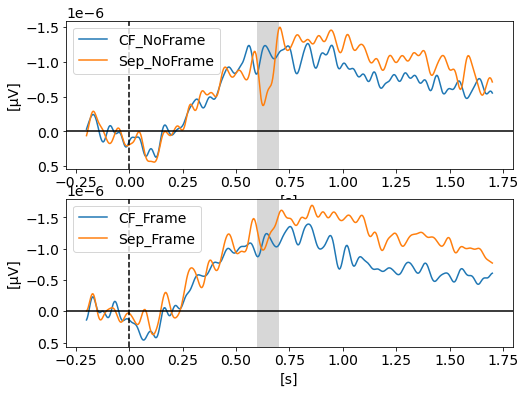

In [3]:
cda_all = dict()

# Get CDA GA
for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict_all.keys():        
        perf = 'good'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2            
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))
            
# Plot
plt.rcParams.update({'font.size': 14})

fig, axs = plt.subplots(2, 1, figsize=(8,6))

axs[0].plot((times), cda_all['CF_NoFrame'].mean(0), label='CF_NoFrame')
axs[0].plot((times), cda_all['Sep_NoFrame'].mean(0), label='Sep_NoFrame')
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

axs[1].plot((times), cda_all['CF_Frame'].mean(0), label='CF_Frame')
axs[1].plot((times), cda_all['Sep_Frame'].mean(0), label='Sep_Frame')
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')

plt.savefig("./{}-reprod.png".format(study_id), dpi=300, format='png')

## Save CDA Data

In [4]:
data_pickle = dict()
data_pickle['times'] = times
data_pickle['CDA'] = cda_dict_all
data_pickle['epochs'] = epochs_dict_all
data_pickle['report'] = report
data_pickle['report_perf'] = perf_report_all

with open("{}_clean-20hz.pkl".format(study_id),"wb") as f:
    pickle.dump(data_pickle, f)

## Load CDA Data

In [2]:
with open("{}_clean-20hz.pkl".format(study_id),"rb") as f:
    data_pickle = pickle.load(f)
    
times = data_pickle['times']
cda_dict_all = data_pickle['CDA']
epochs_dict_all = data_pickle['epochs']
report = data_pickle['report']
perf_report_all = data_pickle['report_perf']

len(cda_dict_all)

16

## Analysis - Bad Perf Trials

Text(0.5, 0, '[s]')

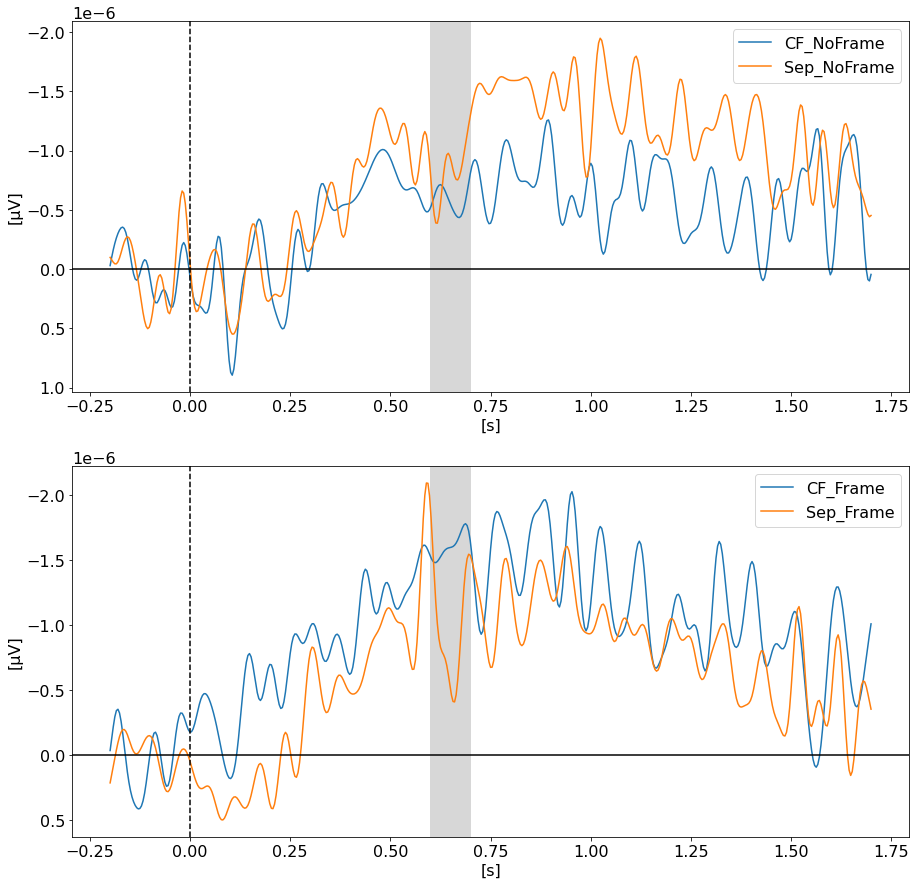

In [6]:
cda_all_bad = dict()

for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all_bad[cond] = dict()

    for f in cda_dict_all.keys():
        perf = 'bad'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in ldict.keys() and len(ldict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['left'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['right'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur            
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

# Plot
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot((times), cda_all_bad['CF_NoFrame'].mean(0), label='CF_NoFrame')
axs[0].plot((times), cda_all_bad['Sep_NoFrame'].mean(0), label='Sep_NoFrame')
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

axs[1].plot((times), cda_all_bad['CF_Frame'].mean(0), label='CF_Frame')
axs[1].plot((times), cda_all_bad['Sep_Frame'].mean(0), label='Sep_Frame')
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')

#plt.savefig("./{}-bad.png".format(study_id), dpi=300, format='png')

## Analysis - Show Spread per subject

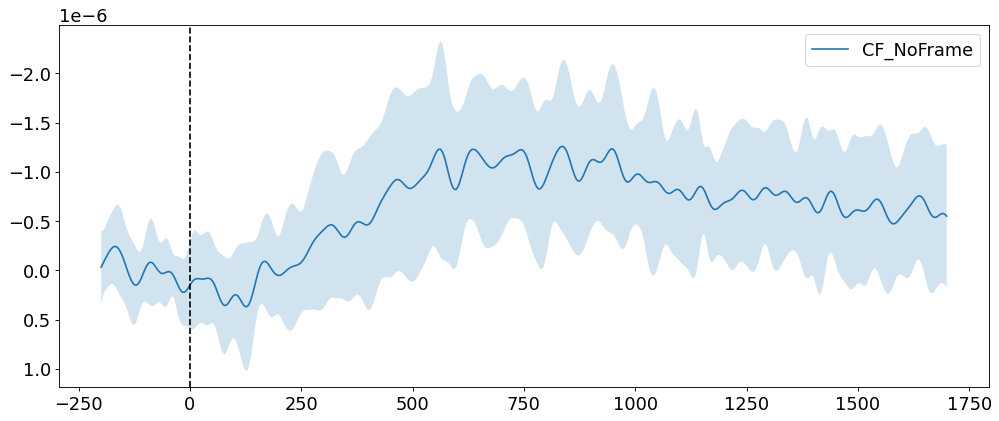

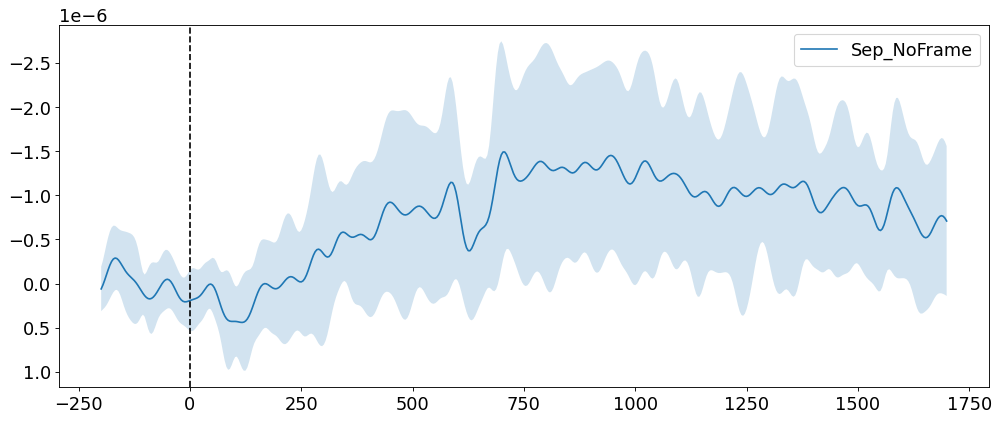

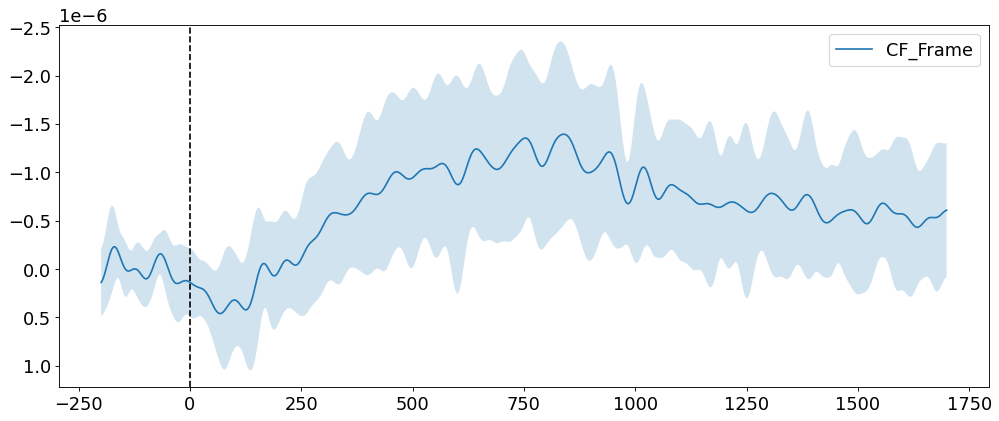

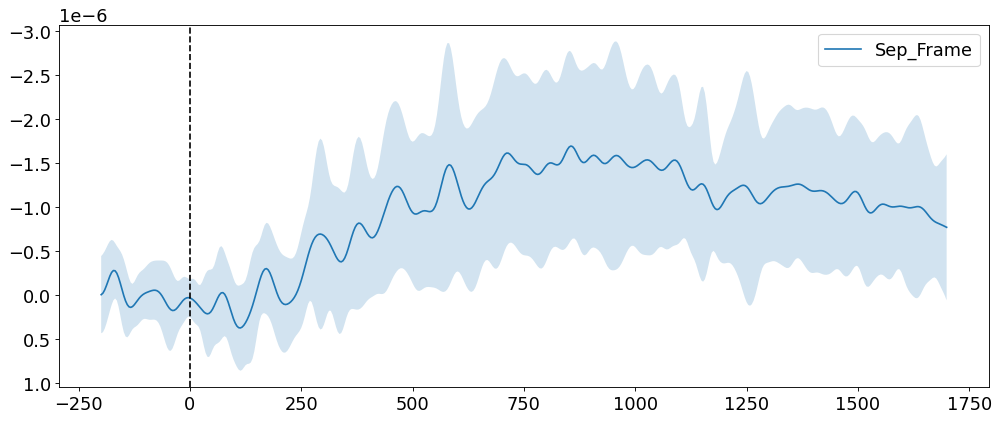

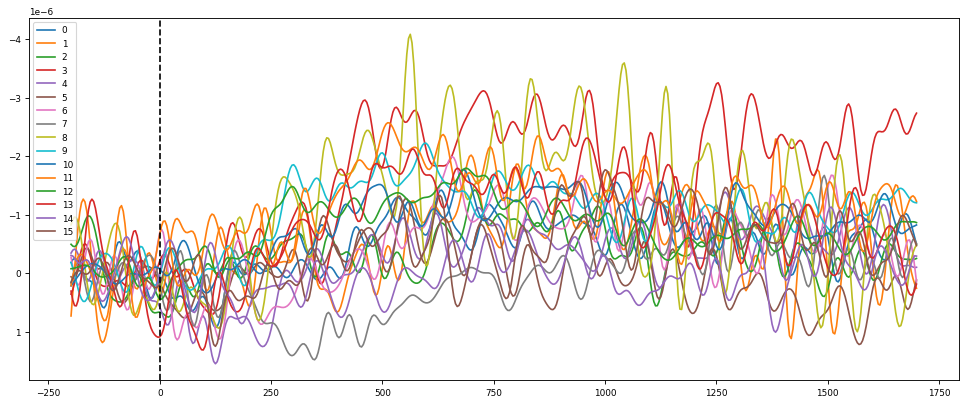

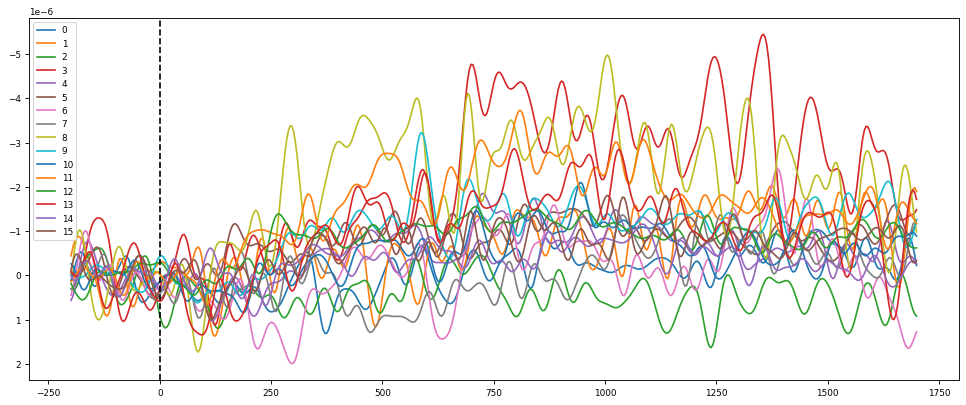

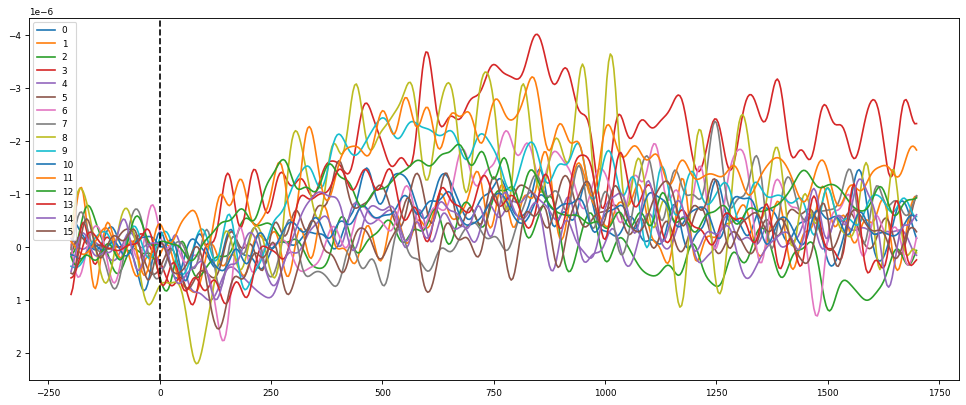

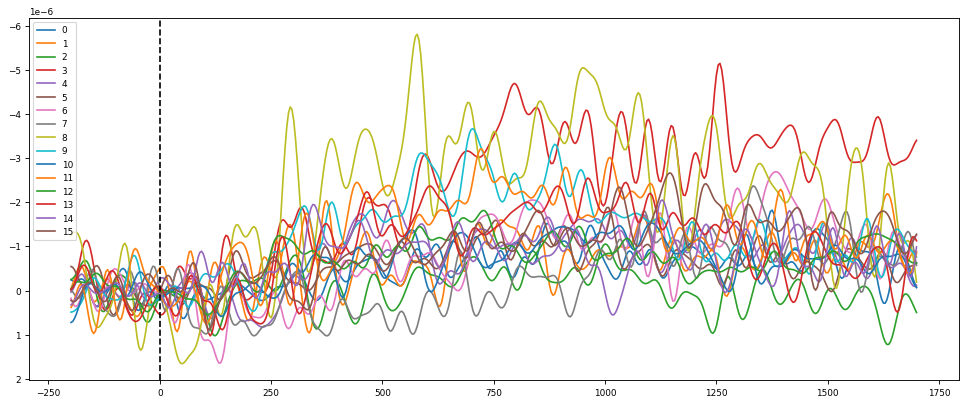

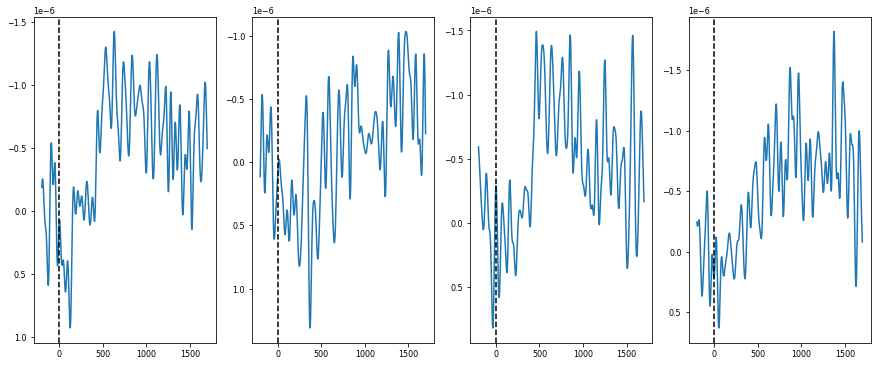

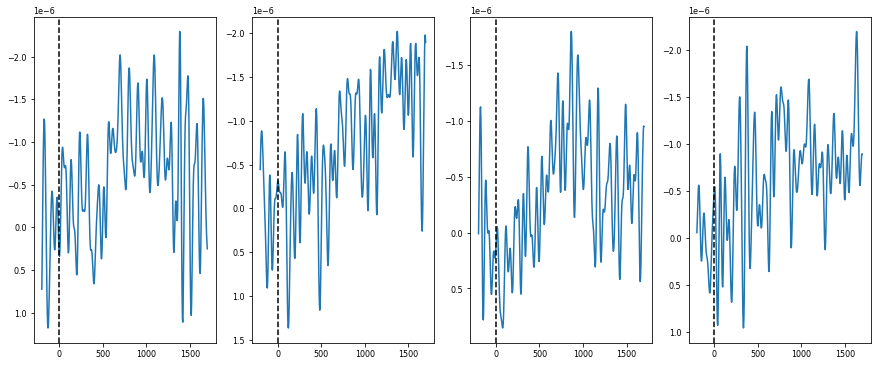

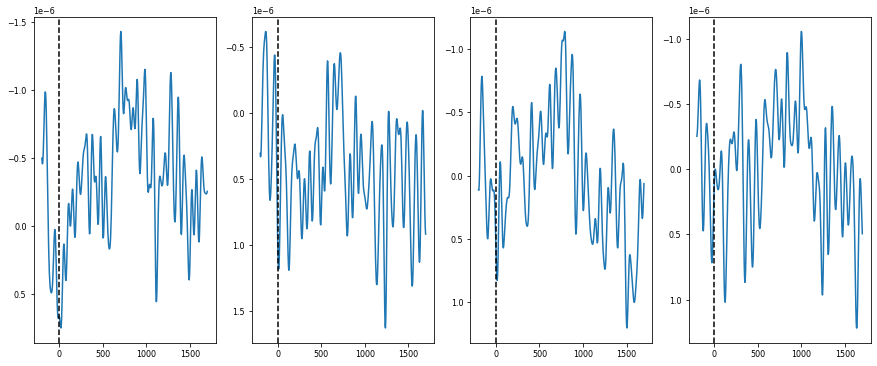

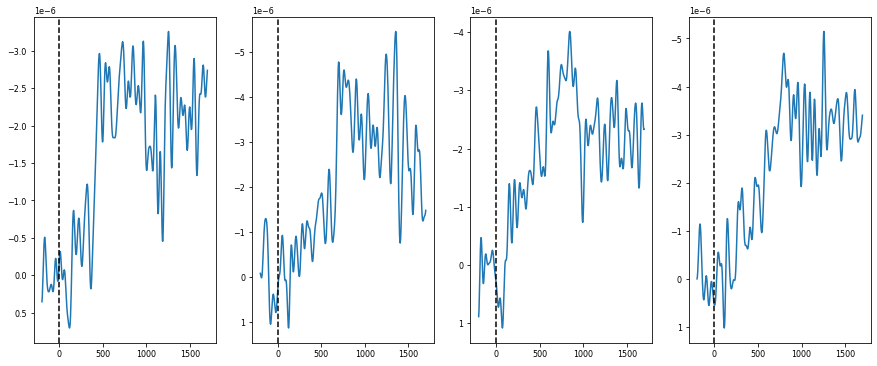

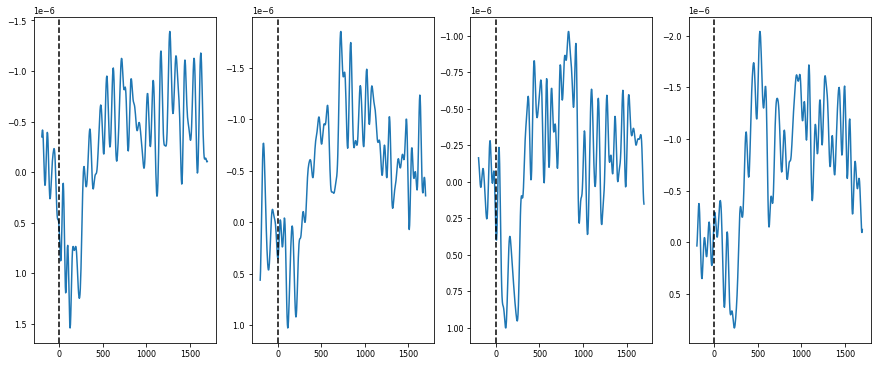

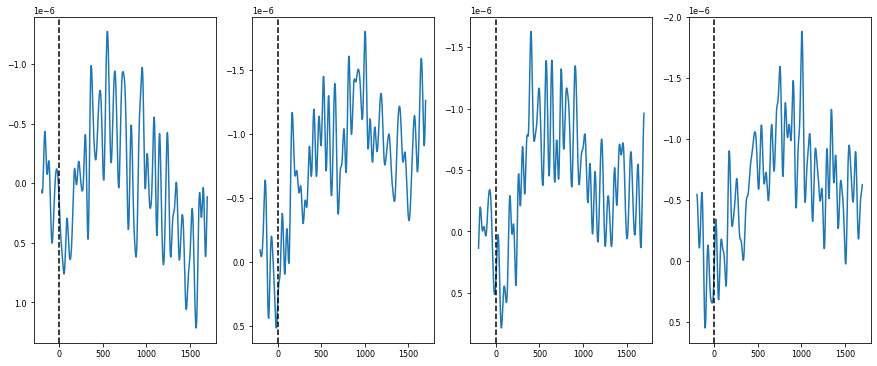

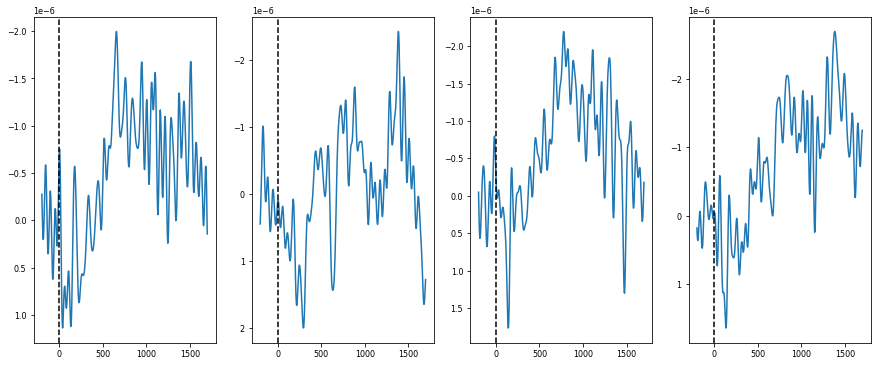

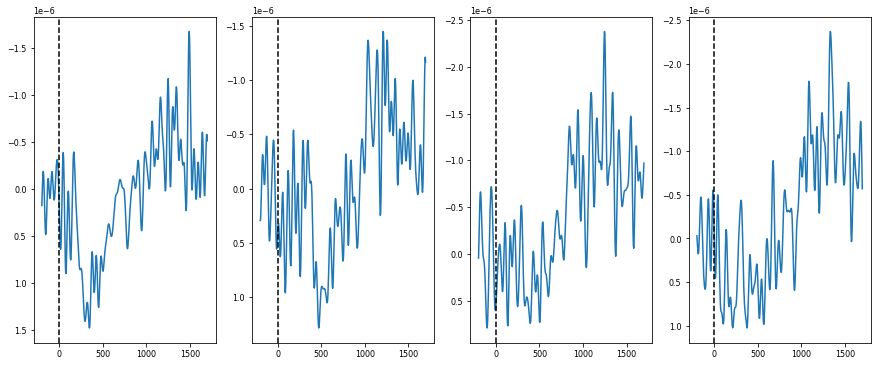

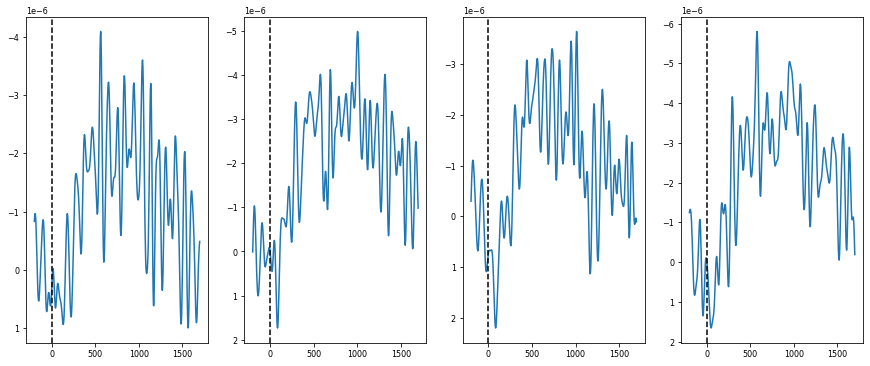

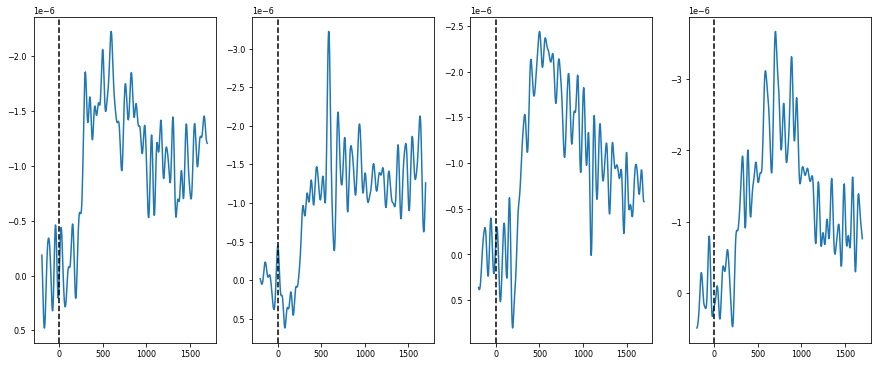

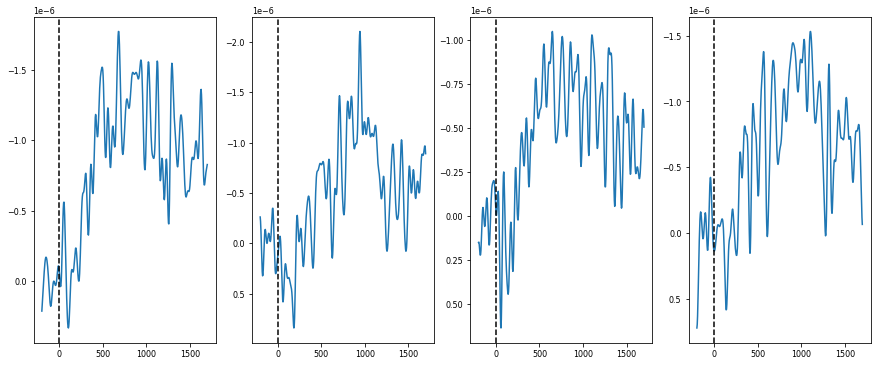

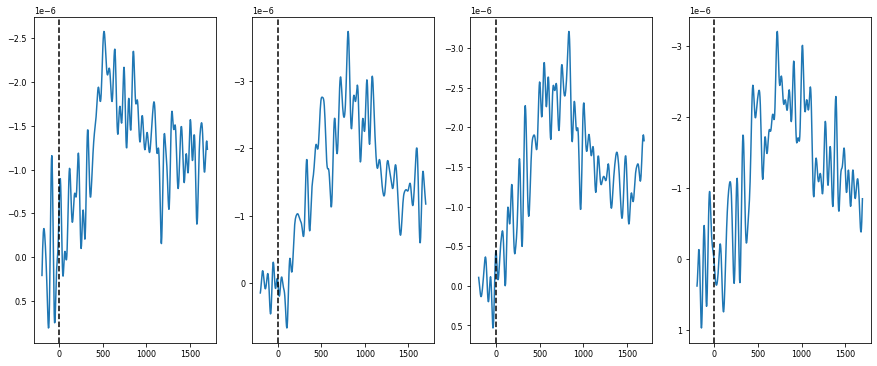

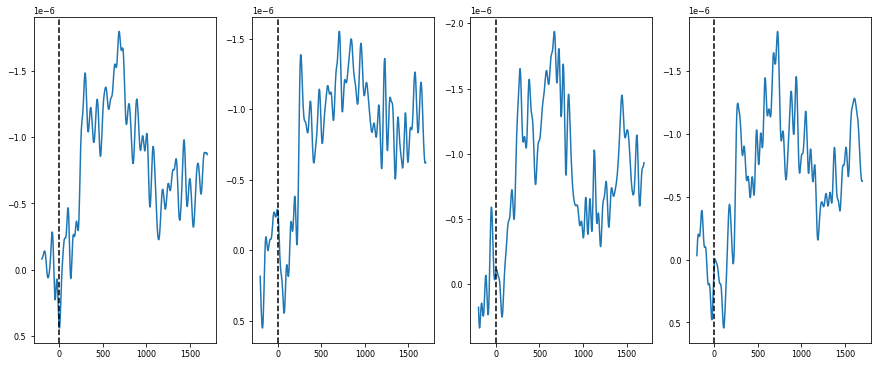

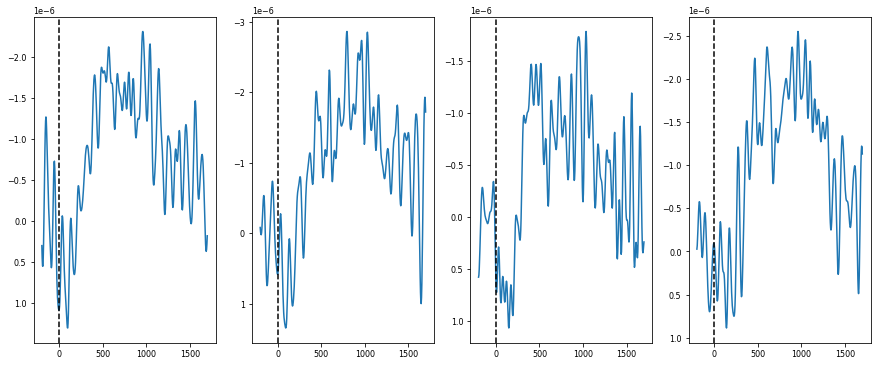

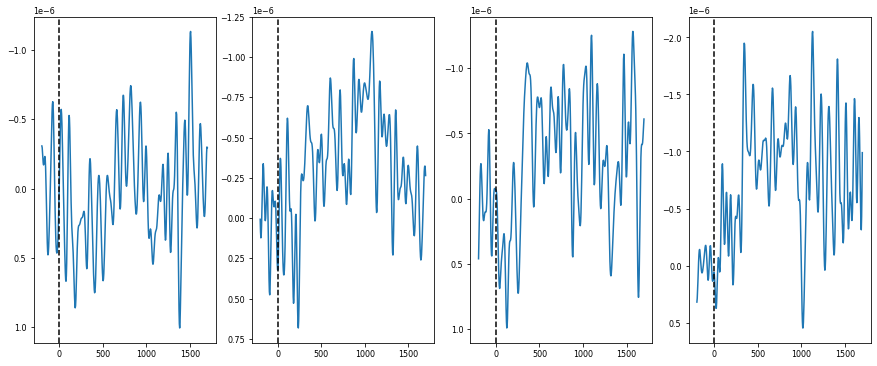

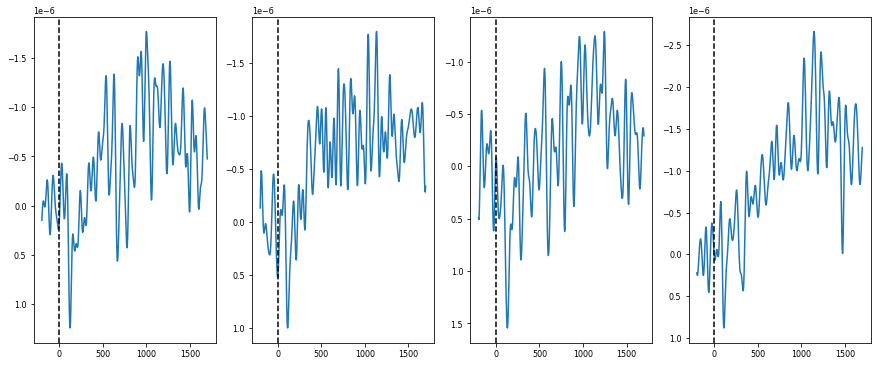

In [7]:
plt.rcParams.update({'font.size': 16})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    means = cda_all[cond].mean(0)
    stds = cda_all[cond].std(0)
    plt.plot((times * 1000), means, label=cond)
    plt.fill_between((times * 1000), means-stds,means+stds,alpha=.2)

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    for i in range(len(cda_all[cond])):
        plt.plot((times * 1000), cda_all[cond][i,:], label='{}'.format(i))

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
#plt.figure(figsize=(15, 6), dpi=80)
for subject in range(len(cda_all[conds[0]])):
    fig, axs = plt.subplots(1, len(conds), figsize=(15,6))
    for i, cond in enumerate(conds):
        axs[i].plot((times * 1000), cda_all[cond][subject,:], label='{}'.format(i))
        axs[i].axvline(x=0, color='k', linestyle='--')
        axs[i].invert_yaxis()
    
#plt.gca().invert_yaxis()
#plt.legend()
plt.show()

## Analysis - Performance Report (CDA per Subject)

In [8]:
report = report.loc[:,~report.columns.duplicated()]

## Subjects: Perf (Good/Bad) vs CDA Amp

Text(0, 0.5, 'Mean CDA Amplitude')

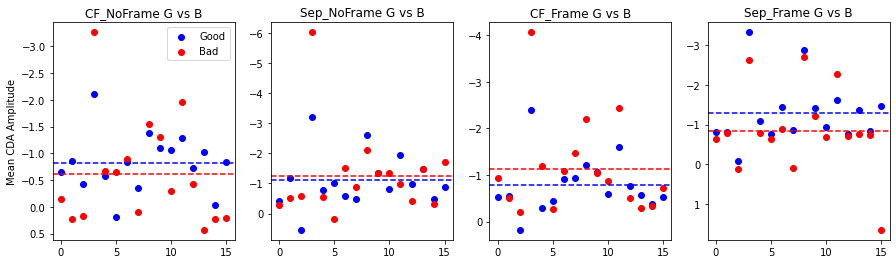

In [9]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    x = range(len(report['{}-right-good-CDA'.format(cond)]))
    
    # Good
    y = (report['{}-right-good-CDA'.format(cond)] + report['{}-left-good-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='blue', label='Good')
    axs[i].axhline(y=np.nanmean(y), color='blue', linestyle='--')
    # Bad
    y = (report['{}-right-bad-CDA'.format(cond)] + report['{}-left-bad-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='red', label='Bad')
    axs[i].axhline(y=np.nanmean(y), color='red', linestyle='--')
    
    axs[i].set_title('{} G vs B'.format(cond))
    axs[i].invert_yaxis()
    
axs[0].legend()
axs[0].set_ylabel('Mean CDA Amplitude')
    

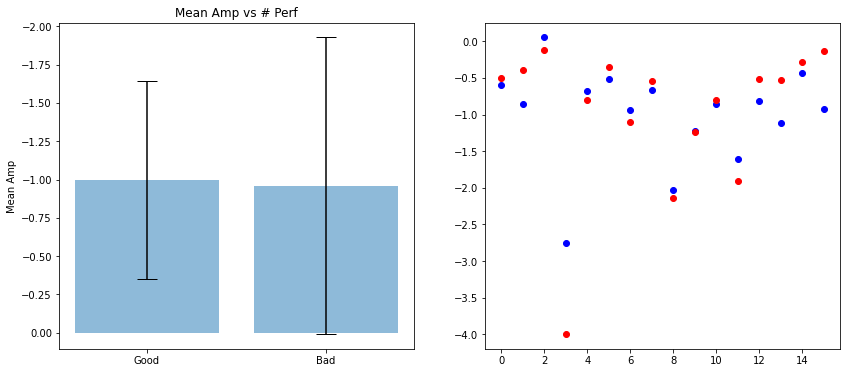

Corr Perf vs CDA Amp: (0.022479040855826426, 0.9028066134439492)


In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Data
goods = np.array(report['good-CDA'])
bads = np.array(report['bad-CDA'])

# Calculate the average
goods_mean = np.nanmean(goods)
bads_mean = np.nanmean(bads)

# Calculate the standard deviation
goods_std = np.nanstd(goods)
bads_std = np.nanstd(bads)

# Define labels, positions, bar heights and error bar heights
labels = ['Good', 'Bad']
x_pos = np.arange(len(labels))
CTEs = [goods_mean, bads_mean]
error = [goods_std, bads_std]

# Build the plot
axs[0].bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
axs[0].set_ylabel('Mean Amp')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(labels)
axs[0].set_title('Mean Amp vs # Perf')
axs[0].invert_yaxis()
#ax.yaxis.grid(True)

x = range(len(report['good-CDA']))
axs[1].scatter(x=x, y=report['good-CDA'], color='blue')
axs[1].scatter(x=x, y=report['bad-CDA'], color='red')

#plt.tight_layout()
plt.show()

import scipy
x = []
y = []
for p in perfs:
    for value in report['{}-CDA'.format(p)]:
        if p == 'good':
            x.append(1)
        else:
            x.append(2)
        y.append(value)

print('Corr Perf vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Condition vs CDA Amp

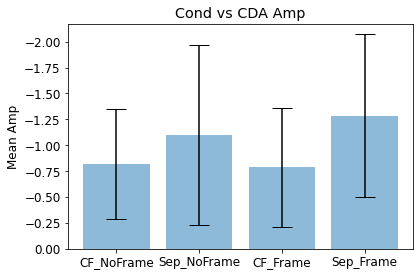

In [11]:
plt.rcParams.update({'font.size': 12})

data_conds = dict()
for cond in conds:
    data_conds[cond] = dict()
    data_conds[cond]['data'] = np.array(report['{}-good-CDA'.format(cond)])
    data_conds[cond]['mean'] = np.nanmean(data_conds[cond]['data'])
    data_conds[cond]['std'] = np.nanstd(data_conds[cond]['data'])
    
labels = conds
x_pos = np.arange(len(labels))
CTEs = [data_conds[cond]['mean'] for cond in conds]
error = [data_conds[cond]['std'] for cond in conds]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Amp')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Cond vs CDA Amp')
ax.invert_yaxis()
#ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Pearson's Correlation
import scipy
x = []
y = []
set_sizes = conds
for i, ss in enumerate(set_sizes):
    for value in report['{}-good-CDA'.format(ss)]:
        x.append(i)
        y.append(value)

print('Corr Cond vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

Corr Cond vs CDA Amp: (-0.16568514915188856, 0.19073046683236047)


## Subjects: Side (Left/Right) vs CDA Amp

Corr Side vs CDA Amp: (-0.26273108618489255, 0.1462892892433586)


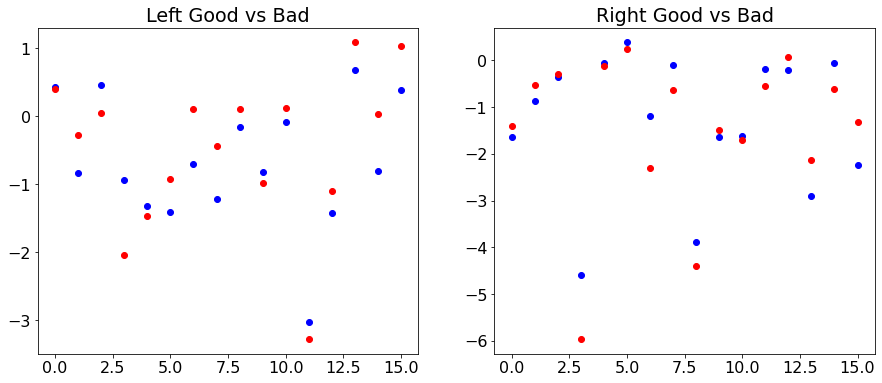

In [13]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, 2, figsize=(15,6))

x = range(len(report['left-good-CDA']))
axs[0].scatter(x=x, y=report['left-good-CDA'], color='blue')
x = range(len(report['left-bad-CDA']))
axs[0].scatter(x=x, y=report['left-bad-CDA'], color='red')
axs[0].set_title('Left Good vs Bad')

x = range(len(report['right-good-CDA']))
axs[1].scatter(x=x, y=report['right-good-CDA'], color='blue')
x = range(len(report['right-bad-CDA']))
axs[1].scatter(x=x, y=report['right-bad-CDA'], color='red')
axs[1].set_title('Right Good vs Bad')

x = []
y = []
for i, side in enumerate(sides):
    for value in report['{}-good-CDA'.format(side)]:
        x.append(i)
        y.append(value)

print('Corr Side vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Accuracy / Performance vs CDA Amp

Corr Perf Acc ~ CF_NoFrame: (-0.7889449401775648, 0.0002803826754480653)
Corr Perf Acc ~ Sep_NoFrame: (-0.48580141389783094, 0.05642129445472584)
Corr Perf Acc ~ CF_Frame: (-0.45528697347434743, 0.07637786193041124)
Corr Perf Acc ~ Sep_Frame: (-0.2454855384061649, 0.35944480809747437)


Text(0, 0.5, 'CDA Mean Amp')

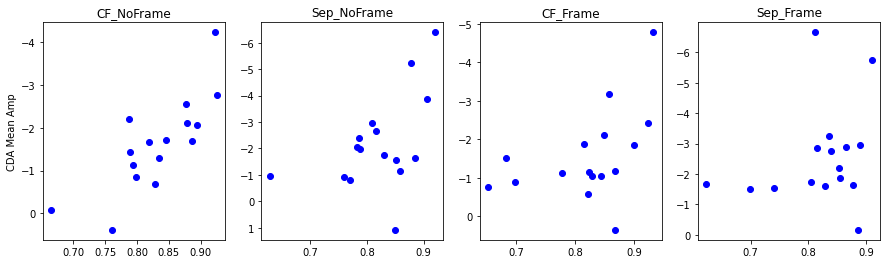

In [14]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    goods = (report['{}-left-good'.format(cond)] + report['{}-right-good'.format(cond)])/2
    bads = (report['{}-left-bad'.format(cond)] + report['{}-right-bad'.format(cond)])/2
    x = goods / (goods + bads)
    y = report['{}-left-good-CDA'.format(cond)] + report['{}-right-good-CDA'.format(cond)]
    axs[i].scatter(x=x, y=y, color='blue')
    axs[i].invert_yaxis()
    axs[i].set_title('{}'.format(cond))
    
    print('Corr Perf Acc ~ {}: {}'.format(cond, scipy.stats.pearsonr(x,y)))

axs[0].set_ylabel('CDA Mean Amp')

## Trials: Conditions vs Amp

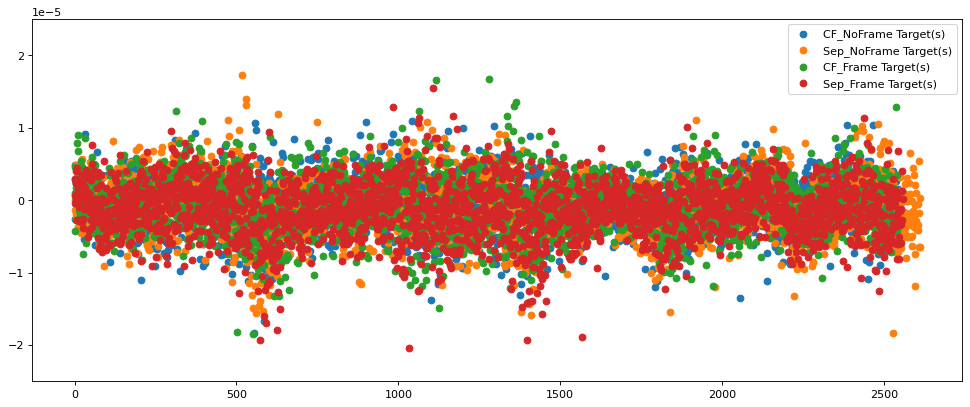

In [15]:
plt.figure(figsize=(15, 6), dpi=80)

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for side in sides:
            for value in perf_report_all[f][cond][side]['good']:
                y1.append(value)
    x1 = range(len(y1))

    plt.scatter(x=x1, y=y1, label='{} Target(s)'.format(cond))

plt.ylim(-2.5*1e-5,2.5*1e-5)
plt.legend()
plt.show()

## Trials: Good vs Bad

Cond = CF_NoFrame Targets: 2548 Good Perf Trials vs 528 Bad Perf Trials, with 0 outliers on graph.
Cond = Sep_NoFrame Targets: 2612 Good Perf Trials vs 576 Bad Perf Trials, with 0 outliers on graph.
Cond = CF_Frame Targets: 2542 Good Perf Trials vs 534 Bad Perf Trials, with 0 outliers on graph.
Cond = Sep_Frame Targets: 2558 Good Perf Trials vs 551 Bad Perf Trials, with 0 outliers on graph.


Text(0, 0.5, 'CDA mean amplitude')

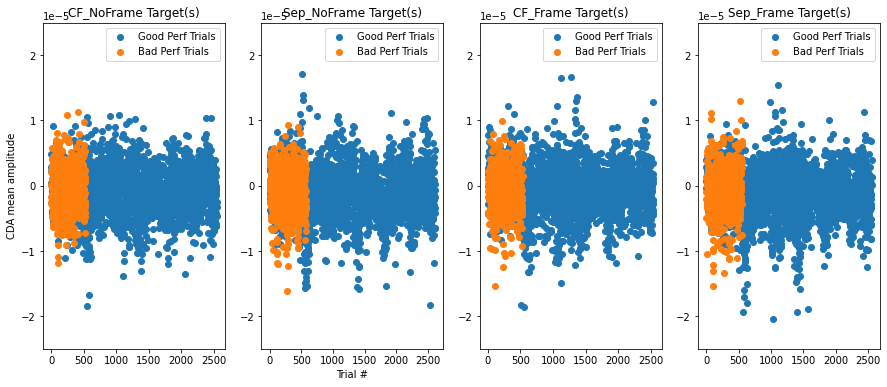

In [16]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
        for value in perf_report_all[f][cond]['right']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        if 'bad' in perf_report_all[f][cond]['left'].keys():
            for value in perf_report_all[f][cond]['left']['bad']:
                y2.append(value)
        if 'bad' in perf_report_all[f][cond]['right'].keys():
            for value in perf_report_all[f][cond]['right']['bad']:
                y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Good Perf Trials')
    axs[i].scatter(x=x2, y=y2, label='Bad Perf Trials')
    axs[i].legend()
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)
    axs[i].set_title('{} Target(s)'.format(cond))

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Perf Trials vs {} Bad Perf Trials, with {} outliers on graph.'.format(cond, len(y1), len(y2), nb_outliers))

axs[1].set_xlabel('Trial #')
axs[0].set_ylabel('CDA mean amplitude')
#fig.tight_layout(pad=1.0)

## Trials: Left vs Right

Cond = CF_NoFrame Targets: 1237 Good Left Trials vs 1311 Good Right Trials, with 0 outliers on graph
Cond = Sep_NoFrame Targets: 1298 Good Left Trials vs 1314 Good Right Trials, with 0 outliers on graph
Cond = CF_Frame Targets: 1270 Good Left Trials vs 1272 Good Right Trials, with 0 outliers on graph
Cond = Sep_Frame Targets: 1233 Good Left Trials vs 1325 Good Right Trials, with 0 outliers on graph


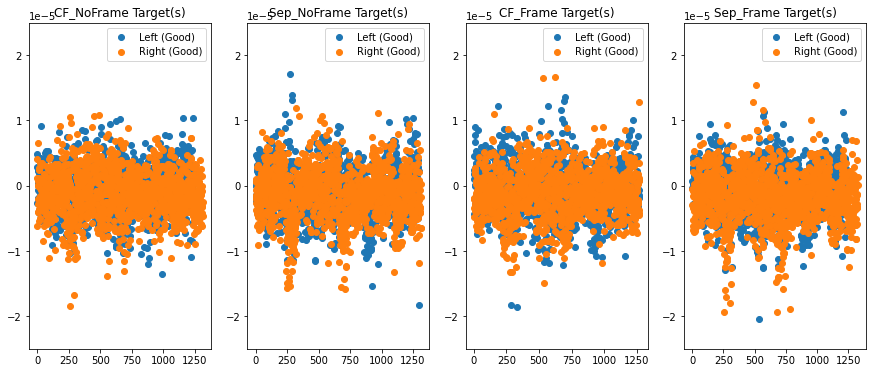

In [17]:
fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['right']['good']:
            y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Left (Good)')
    axs[i].scatter(x=x2, y=y2, label='Right (Good)')
    axs[i].legend()
    axs[i].set_title('{} Target(s)'.format(cond))
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Left Trials vs {} Good Right Trials, with {} outliers on graph'.format(cond, len(y1), len(y2), nb_outliers))
        